In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

data = pd.read_csv("RainfallData.csv")
print(data.head())

       date   meantemp   humidity  wind_speed  meanpressure
0  1/1/2018  10.000000  84.500000    0.000000   1015.666667
1  1/2/2018   7.400000  92.000000    2.980000   1017.800000
2  1/3/2018   7.166667  87.000000    4.633333   1018.666667
3  1/4/2018   8.666667  71.333333    1.233333   1017.166667
4  1/5/2018   6.000000  86.833333    3.700000   1016.500000


In [14]:
print(data.describe())

          meantemp     humidity   wind_speed  meanpressure
count  1461.000000  1461.000000  1461.000000   1461.000000
mean      4.243421    60.744851     6.806865   1011.101197
std      10.039826    16.743928     4.559688    180.293335
min       0.000000    13.428571     0.000000     -3.041667
25%       0.000000    50.375000     3.475000   1001.571429
50%       0.000000    62.625000     6.250000   1008.555556
75%       0.000000    72.125000     9.250000   1014.937500
max      37.625000    98.000000    42.220000   7679.333333


In [15]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1461 non-null   object 
 1   meantemp      1461 non-null   float64
 2   humidity      1461 non-null   float64
 3   wind_speed    1461 non-null   float64
 4   meanpressure  1461 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB
None


In [16]:
figure = px.line(data, x="date", 
                 y="meantemp", 
                 title='Mean Temperature in Delhi Over the Years')
figure.show()

In [17]:
figure = px.line(data, x="date", 
                 y="humidity", 
                 title='Humidity in Delhi Over the Years')
figure.show()

In [18]:
figure = px.scatter(data_frame = data, x="humidity",
                    y="meantemp", size="meantemp", 
                    trendline="ols", 
                    title = "Relationship Between Temperature and Humidity")
figure.show()

In [19]:
data["date"] = pd.to_datetime(data["date"])
data['year'] = data['date'].dt.year
data["month"] = data["date"].dt.month
print(data.head())

        date   meantemp   humidity  wind_speed  meanpressure  year  month
0 2018-01-01  10.000000  84.500000    0.000000   1015.666667  2018      1
1 2018-01-02   7.400000  92.000000    2.980000   1017.800000  2018      1
2 2018-01-03   7.166667  87.000000    4.633333   1018.666667  2018      1
3 2018-01-04   8.666667  71.333333    1.233333   1017.166667  2018      1
4 2018-01-05   6.000000  86.833333    3.700000   1016.500000  2018      1


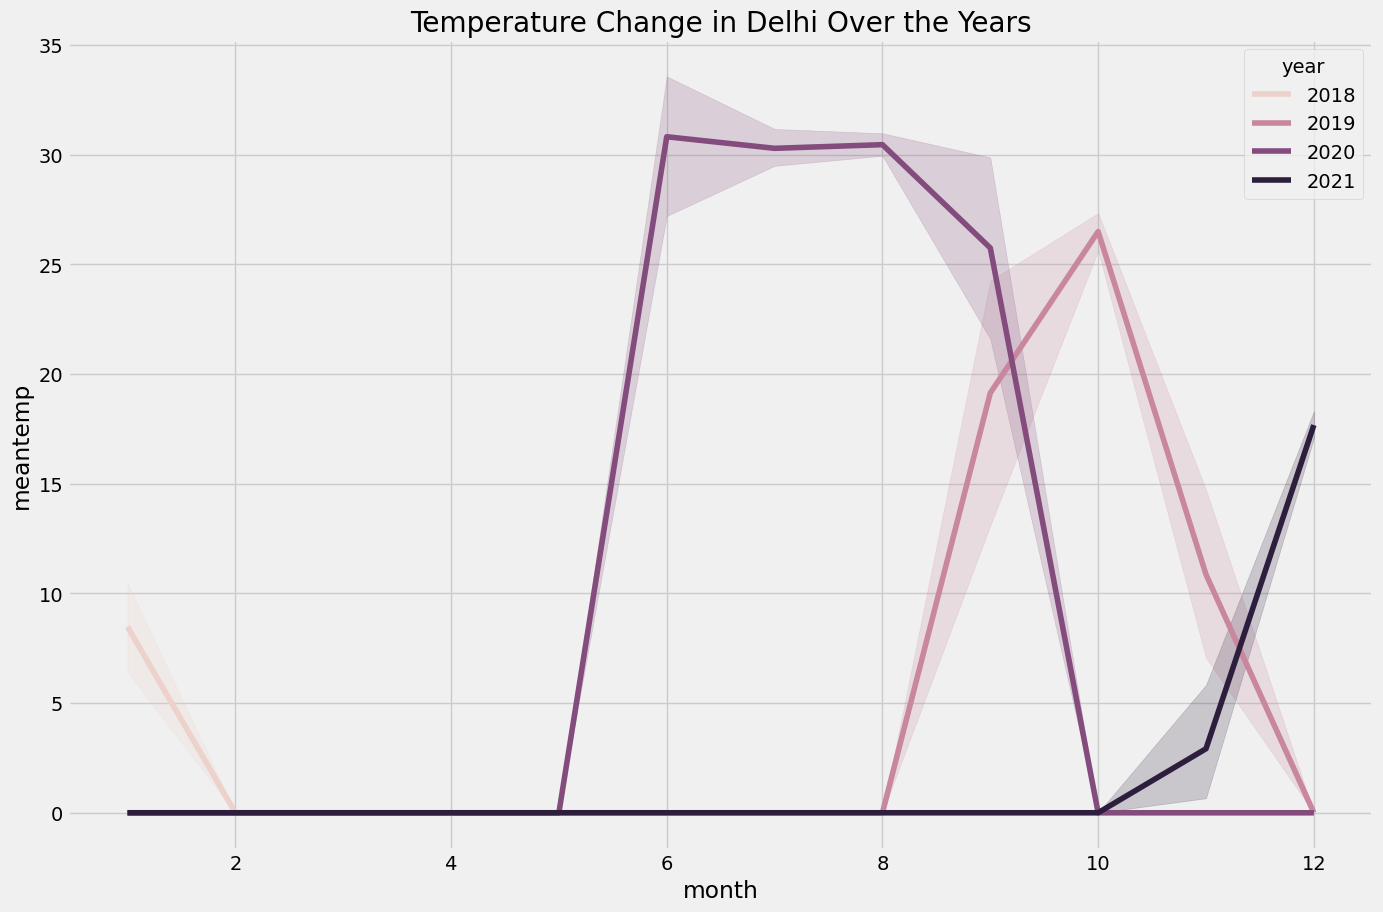

In [20]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 10))
plt.title("Temperature Change in Delhi Over the Years")
sns.lineplot(data = data, x='month', y='meantemp', hue='year')
plt.show()

In [21]:
forecast_data = data.rename(columns = {"date": "ds", 
                                       "meantemp": "y"})
print(forecast_data)

             ds          y   humidity  wind_speed  meanpressure  year  month
0    2018-01-01  10.000000  84.500000    0.000000   1015.666667  2018      1
1    2018-01-02   7.400000  92.000000    2.980000   1017.800000  2018      1
2    2018-01-03   7.166667  87.000000    4.633333   1018.666667  2018      1
3    2018-01-04   8.666667  71.333333    1.233333   1017.166667  2018      1
4    2018-01-05   6.000000  86.833333    3.700000   1016.500000  2018      1
...         ...        ...        ...         ...           ...   ...    ...
1456 2021-12-27  16.850000  67.550000    8.335000   1017.200000  2021     12
1457 2021-12-28  17.217391  68.043478    3.547826   1015.565217  2021     12
1458 2021-12-29  15.238095  87.857143    6.000000   1016.904762  2021     12
1459 2021-12-30  14.095238  89.666667    6.266667   1017.904762  2021     12
1460 2021-12-31  15.052632  87.000000    7.325000   1016.100000  2021     12

[1461 rows x 7 columns]


In [22]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
model = Prophet()
model.fit(forecast_data)
forecasts = model.make_future_dataframe(periods=365)
predictions = model.predict(forecasts)
plot_plotly(model, predictions)

20:49:47 - cmdstanpy - INFO - Chain [1] start processing
20:49:47 - cmdstanpy - INFO - Chain [1] done processing
